In [13]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

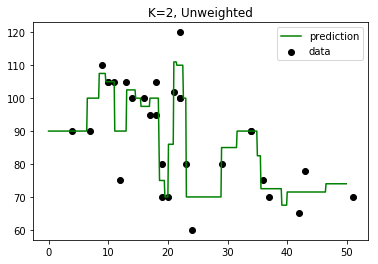

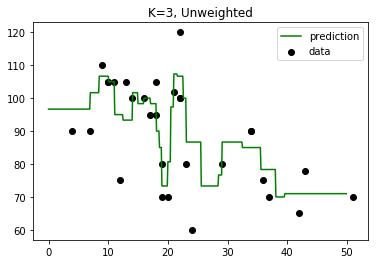

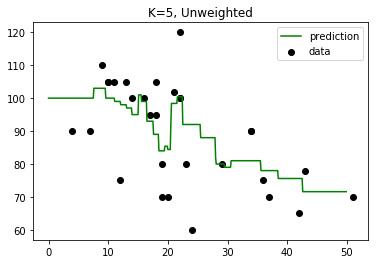

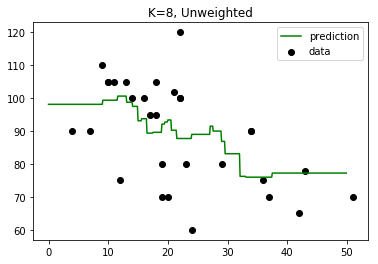

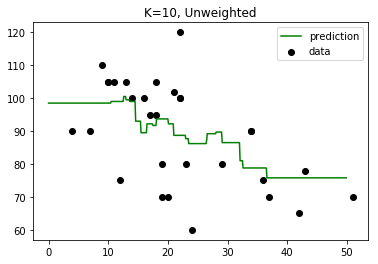


Folds = 2, K = 2
Unweighted Accuracy: 0.11 +/- 0.27
Weighted Accuracy: 0.25 +/- 0.48

Folds = 4, K = 2
Unweighted Accuracy: -0.04 +/- 0.93
Weighted Accuracy: 0.14 +/- 0.69

Folds = 6, K = 2
Unweighted Accuracy: -0.5 +/- 3.14
Weighted Accuracy: -0.35 +/- 3.14

Folds = 8, K = 2
Unweighted Accuracy: -0.4 +/- 2.65
Weighted Accuracy: -0.25 +/- 2.8

Max Unweighted Score: 0.11
Max Weighted Score: 0.25

Folds = 2, K = 3
Unweighted Accuracy: 0.15 +/- 0.1
Weighted Accuracy: 0.35 +/- 0.31

Folds = 4, K = 3
Unweighted Accuracy: 0.1 +/- 0.53
Weighted Accuracy: 0.26 +/- 0.73

Folds = 6, K = 3
Unweighted Accuracy: 0.03 +/- 1.19
Weighted Accuracy: 0.2 +/- 0.91

Folds = 8, K = 3
Unweighted Accuracy: -0.02 +/- 0.61
Weighted Accuracy: 0.17 +/- 0.86

Max Unweighted Score: 0.15
Max Weighted Score: 0.35

Folds = 2, K = 5
Unweighted Accuracy: 0.12 +/- 0.19
Weighted Accuracy: 0.34 +/- 0.35

Folds = 4, K = 5
Unweighted Accuracy: -0.23 +/- 0.99
Weighted Accuracy: 0.22 +/- 0.79

Folds = 6, K = 5
Unweighted Accu

In [78]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

fold_nums = np.arange(2,8,1)
un_scores = []
w_scores = []

def plot_relationship(dataset, input, output):
    neighbors_num = [2,3,5,8,10]
    
    for n in neighbors_num:
        knn = neighbors.KNeighborsRegressor(n_neighbors=n)
        X = pd.DataFrame(dataset[input])
        Y = dataset[output]
        knn.fit(X, Y)

        T = np.arange(0, 50, 0.1)[:, np.newaxis]
        Y_ = knn.predict(T)

        plt.scatter(X, Y, c='k', label='data')
        plt.plot(T, Y_, c='g', label='prediction')
        plt.legend()
        plt.title(f'K={n}, Unweighted')
        plt.show()
        
plot_relationship(music,'loudness','bpm')

def build_model(dataset, input, output):
    X = pd.DataFrame(dataset[input])
    Y = dataset[output]
    
    neighbors_num = [2,3,5,8,10]
    un_scores = []
    w_scores = []
    
    for n in neighbors_num:
        knn = neighbors.KNeighborsRegressor(n_neighbors=n)
        knn.fit(X, Y)
        
        knn_w = neighbors.KNeighborsRegressor(n_neighbors=n, weights='distance')
        knn_w.fit(X, Y)
        
        fold_nums = [2,4,6,8]
        
        for fold_num in fold_nums:
            score = cross_val_score(knn, X, Y, cv = fold_num)
            score_w = cross_val_score(knn_w, X, Y, cv = fold_num)
            print(f"\nFolds = {fold_num}, K = {n}")
            print(f'Unweighted Accuracy: {round(score.mean(),2)} +/- {round((score.std() * 2),2)}')
            print(f'Weighted Accuracy: {round(score_w.mean(),2)} +/- {round((score_w.std() * 2),2)}')
            
            un_scores.append(score.mean())
            w_scores.append(score_w.mean())
                
            #print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % score.mean(), score.std() * 2)
            #print("Weight Accuracy: %0.2f (+/-) %0.2f" % score_w.mean(), score_w.std() * 2)
        
        print(f'\nMax Unweighted Score: {round(max(un_scores),2)}')
        print(f'Max Weighted Score: {round(max(w_scores),2)}')
        
build_model(music,'loudness','bpm')

In [79]:
build_model(music,['loudness','duration'],'bpm')


Folds = 2, K = 2
Unweighted Accuracy: -0.73 +/- 0.79
Weighted Accuracy: -0.74 +/- 0.72

Folds = 4, K = 2
Unweighted Accuracy: -0.22 +/- 0.73
Weighted Accuracy: -0.15 +/- 0.65

Folds = 6, K = 2
Unweighted Accuracy: -0.58 +/- 1.89
Weighted Accuracy: -0.56 +/- 2.35

Folds = 8, K = 2
Unweighted Accuracy: -0.75 +/- 1.13
Weighted Accuracy: -0.66 +/- 1.58

Max Unweighted Score: -0.22
Max Weighted Score: -0.15

Folds = 2, K = 3
Unweighted Accuracy: -0.21 +/- 0.28
Weighted Accuracy: -0.32 +/- 0.48

Folds = 4, K = 3
Unweighted Accuracy: -0.39 +/- 0.54
Weighted Accuracy: -0.18 +/- 0.43

Folds = 6, K = 3
Unweighted Accuracy: -0.63 +/- 1.59
Weighted Accuracy: -0.48 +/- 1.76

Folds = 8, K = 3
Unweighted Accuracy: -0.54 +/- 0.88
Weighted Accuracy: -0.38 +/- 0.95

Max Unweighted Score: -0.21
Max Weighted Score: -0.15

Folds = 2, K = 5
Unweighted Accuracy: -0.16 +/- 0.06
Weighted Accuracy: -0.21 +/- 0.24

Folds = 4, K = 5
Unweighted Accuracy: -0.17 +/- 0.51
Weighted Accuracy: -0.06 +/- 0.45

Folds = 6

Wow! When adding a new feature, the accuracy drops even lower than it was before. Now it's really bad, and the maximum is 0, most values are negative. This means that our model is even worse than our baseline, which is the mean of the output. We should not use duration as a feature in the model, which makes sense because duration doesn't have much impact on difference between typical rock/jazz songs.